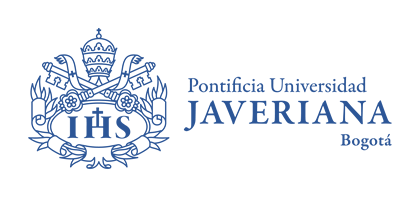

# Técnicas de aprendizaje de máquina - Proyecto 1

## Integrantes
- Andrés García Montoya
- Juan José Gomez Arenas

### Instalación de dependencias

In [70]:
#!pip install -r requirements.txt

### Importación de librerías

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

# **Comprension del Dataset**


### Carga de datos

In [72]:
df = pd.read_csv('Data/data_ord.csv')
df.head()

,Unnamed: 0,p1card1,p1card2,p1card3,p1card4,p1card5,p1card6,p1card7,p1card8,p2card1,p2card2,p2card3,p2card4,p2card5,p2card6,p2card7,p2card8,p1trophies,p2trophies,outcome
0,0,8,34,37,52,69,88,92,97,11,12,13,58,77,86,87,98,7578,7597,1
1,1,8,34,37,52,69,88,92,97,11,37,53,83,88,92,97,102,7548,7551,1
2,2,8,34,37,52,69,88,92,97,19,22,25,32,54,76,87,98,7518,7523,1
3,3,8,34,37,52,69,88,92,97,28,38,43,46,50,81,102,103,7485,7523,1
4,4,25,31,59,68,77,98,101,105,23,34,39,73,85,94,98,99,7126,7114,1


### Dimensiones del dataset

In [73]:
df.shape

(718886, 20)

El dataset cuenta con 718886 filas y 20 columnas

### Descripción de las columnas


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 718886 entries, 0 to 718885
Data columns (total 20 columns):
 #   Column      Non-Null Count   Dtype
---  ------      --------------   -----
 0   Unnamed: 0  718886 non-null  int64
 1   p1card1     718886 non-null  int64
 2   p1card2     718886 non-null  int64
 3   p1card3     718886 non-null  int64
 4   p1card4     718886 non-null  int64
 5   p1card5     718886 non-null  int64
 6   p1card6     718886 non-null  int64
 7   p1card7     718886 non-null  int64
 8   p1card8     718886 non-null  int64
 9   p2card1     718886 non-null  int64
 10  p2card2     718886 non-null  int64
 11  p2card3     718886 non-null  int64
 12  p2card4     718886 non-null  int64
 13  p2card5     718886 non-null  int64
 14  p2card6     718886 non-null  int64
 15  p2card7     718886 non-null  int64
 16  p2card8     718886 non-null  int64
 17  p1trophies  718886 non-null  int64
 18  p2trophies  718886 non-null  int64
 19  outcome     718886 non-null  int64
dtypes: i

Cada fila representa una batalla.  
* Las primeras 8 columnas describen el mazo del Jugador 1, representando cada carta con un número.  
* Las siguientes 8 columnas describen el mazo del Jugador 2, representando cada carta con un número.  
* Las siguientes 2 columnas describen los respectivos conteos de trofeos de los * Jugadores 1 y 2.  
* La última columna indica el resultado de la batalla; 1 si gana el Jugador 1, y 0 si gana el Jugador 2. Está es la variable objetivo.

### Limpieza de datos

In [75]:
df.isna().sum()

Unnamed: 0    0
p1card1       0
p1card2       0
p1card3       0
p1card4       0
p1card5       0
p1card6       0
p1card7       0
p1card8       0
p2card1       0
p2card2       0
p2card3       0
p2card4       0
p2card5       0
p2card6       0
p2card7       0
p2card8       0
p1trophies    0
p2trophies    0
outcome       0
dtype: int64

In [76]:
df.duplicated().sum()

0

No hay datos faltantes ni duplicados en el dataset.

### Correlación de las variables
En esta etapa se revisa únicamente la correlación de las variables numéricas

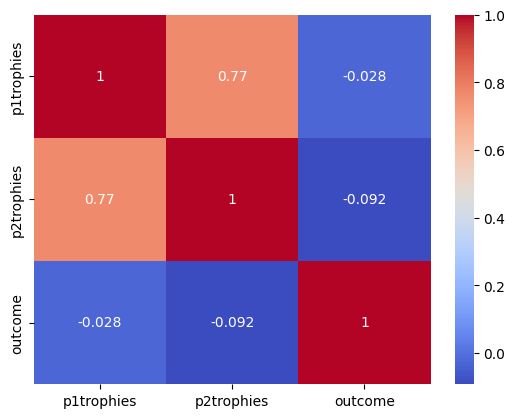

In [77]:
# Las unicas columnas numericas son la cantidad de trofeos de cada jugador, ya que el resto son variables categoricas que aún no se han transformado
df_numerico = df.iloc[:, 17:20]
correlacion = df_numerico.corr()
sns.heatmap(correlacion, annot=True, cmap='coolwarm')
plt.show()

Como se puede observar, las variables de trofeos no presentan una correlación significativa con la variable objetivo. Sin embargo, las variables de trofeos de jugador 1 y jugador 2 presentan una alta correlación, lo cual puede ser un indicio de multicolinealidad.

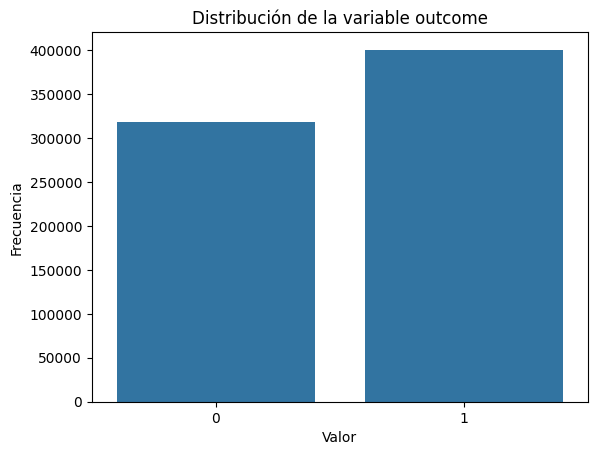

In [78]:
import seaborn as sns

# Crear el gráfico de barras
sns.countplot(x='outcome', data=df)

plt.title('Distribución de la variable outcome')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')

plt.show()


# *Preprocesamiento de datos*

### Eliminación de variables

In [79]:
# Se elimina la primera columna, ya que no aporta información relevante
df = df.drop(columns=['Unnamed: 0'])

### Combinación de variables de trofeos
Estas variables presentan una alta correlación, por lo que se procede a combinarlas en una sola variable. Esto se hace promediando los valores de ambas variables.

In [80]:
df_trofeos = df[['p1trophies', 'p2trophies']]
df = df.drop(columns=['p1trophies', 'p2trophies'])
df['trofeos'] = df_trofeos.mean(axis=1)
df.head()

,p1card1,p1card2,p1card3,p1card4,p1card5,p1card6,p1card7,p1card8,p2card1,p2card2,p2card3,p2card4,p2card5,p2card6,p2card7,p2card8,outcome,trofeos
0,8,34,37,52,69,88,92,97,11,12,13,58,77,86,87,98,1,7587.5
1,8,34,37,52,69,88,92,97,11,37,53,83,88,92,97,102,1,7549.5
2,8,34,37,52,69,88,92,97,19,22,25,32,54,76,87,98,1,7520.5
3,8,34,37,52,69,88,92,97,28,38,43,46,50,81,102,103,1,7504.0
4,25,31,59,68,77,98,101,105,23,34,39,73,85,94,98,99,1,7120.0


### Transformación de variables categóricas
Se procede a transformar las variables categóricas de los mazos de cartas en variables dummy con one-hot encoding. Con esto se evita que el modelo asuma una relación ordinal entre las cartas.

In [82]:
# Inicialización de un diccionario para la codificación
# Se omite la carta 105, ya que al dummyficarla esta no se necesita
encoded_data = {f'{i}_p1': [0] * len(df) for i in range(106)}
encoded_data.update({f'{i}_p2': [0] * len(df) for i in range(106)})

# Iterar sobre cada fila del DataFrame original
for index, row in df.iterrows():
    # Codificar las cartas del jugador 1
    for i in range(1, 9):  # Asumiendo que hay 8 cartas para p1 y p2
        card_p1 = row[f'p1card{i}']
        card_p2 = row[f'p2card{i}']
        
        card_p1 = int(card_p1)
        card_p2 = int(card_p2)
        
        # Marcar la presencia de la carta en las columnas correspondientes
        encoded_data[f'{card_p1}_p1'][index] = 1
        encoded_data[f'{card_p2}_p2'][index] = 1

# Convertir el diccionario a un DataFrame
df_encoded = pd.DataFrame(encoded_data)
df_encoded.head()

,0_p1,1_p1,2_p1,3_p1,4_p1,5_p1,6_p1,7_p1,8_p1,9_p1,...,96_p2,97_p2,98_p2,99_p2,100_p2,101_p2,102_p2,103_p2,104_p2,105_p2
0,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0


In [83]:
# Se eliminan 105_p1 y 105_p2 ya que no se necesitan, dado que por la dummyficación de las cartas, si la octava carta no está en ninguna de las columnas, se asume que es la carta 105
df_encoded = df_encoded.drop(columns=['105_p1', '105_p2'])

In [84]:
# Eliminar las columnas originales de cartas
df = df.drop(df.iloc[:, 0:16], axis=1)
# Concatenar el DataFrame original con el DataFrame de cartas codificadas
df = pd.concat([df, df_encoded], axis=1)
df.head()

,outcome,trofeos,0_p1,1_p1,2_p1,3_p1,4_p1,5_p1,6_p1,7_p1,...,95_p2,96_p2,97_p2,98_p2,99_p2,100_p2,101_p2,102_p2,103_p2,104_p2
0,1,7587.5,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,1,7549.5,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,1,7520.5,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,1,7504.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
4,1,7120.0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0


In [85]:
cardlist = pd.read_csv('Data/cardlist.csv')  

#Crear un diccionario para mapear el ID de la carta a su nombre
card_mapping = dict(zip(cardlist['id'], cardlist['card']))


new_columns = []
for col in df.columns:
    if '_p1' in col or '_p2' in col:  # Solo renombrar las columnas de las cartas
        card_id = int(col.split('_')[0])  # Extraer el ID de la columna
        card_name = card_mapping.get(card_id, col) 
        new_col = card_name + col[col.index('_'):]  # Reemplazar el ID con el nombre
        new_columns.append(new_col)
    else:
        new_columns.append(col)  

# Asignar los nuevos nombres de columnas al DataFrame
df.columns = new_columns

print(df.head())

   outcome  trofeos  Knight_p1  Archers_p1  Goblins_p1  Giant_p1  \
0        1   7587.5          0           0           0         0   
1        1   7549.5          0           0           0         0   
2        1   7520.5          0           0           0         0   
3        1   7504.0          0           0           0         0   
4        1   7120.0          0           0           0         0   

   P.E.K.K.A_p1  Minions_p1  Balloon_p1  Witch_p1  ...  Zap_p2  Poison_p2  \
0             0           0           0         0  ...       0          0   
1             0           0           0         0  ...       0          0   
2             0           0           0         0  ...       0          0   
3             0           0           0         0  ...       0          0   
4             0           0           0         0  ...       0          0   

   Graveyard_p2  The Log_p2  Tornado_p2  Clone_p2  Earthquake_p2  \
0             0           1           0         0           

### Normalización de los datos

In [86]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df["trofeos"] = scaler.fit_transform(df["trofeos"].values.reshape(-1, 1))
df.head()

,outcome,trofeos,Knight_p1,Archers_p1,Goblins_p1,Giant_p1,P.E.K.K.A_p1,Minions_p1,Balloon_p1,Witch_p1,...,Zap_p2,Poison_p2,Graveyard_p2,The Log_p2,Tornado_p2,Clone_p2,Earthquake_p2,Barbarian Barrel_p2,Heal Spirit_p2,Giant Snowball_p2
0,1,2.876421,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,1,2.782780,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,1,2.711316,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,1,2.670656,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
4,1,1.724387,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0


### División de los datos


In [87]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['outcome'])
y = df['outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# **Modelos de aprendizaje de máquina**

## Red neuronal 1
Construcción de una red neuronal con 5 capas ocultas, con 256, 128, 64, 32 y 16 neuronas respectivamente. Se utiliza la función de activación ReLU en las capas ocultas y una capa de salida con activación sigmoide. Esta red sigue una arquitectura piramidal, con una disminución en el número de neuronas en cada capa.

### Creación del modelo

In [88]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model1 = Sequential()
model1.add(Dense(256, activation='relu'))
model1.add(Dense(128, activation='relu'))
model1.add(Dense(64, activation='relu'))
model1.add(Dense(32, activation='relu'))
model1.add(Dense(16, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', tf.keras.metrics.Recall(),tf.keras.metrics.Precision(), tf.keras.metrics.F1Score()])
model1.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

### Entrenamiento del modelo

In [89]:
history1 = model1.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_test, y_test))

Epoch 1/10
3932/3932 ━━━━━━━━━━━━━━━━━━━━ 25s 5ms/step - accuracy: 0.5644 - f1_score: 0.7154 - loss: 0.6799 - precision_2: 0.5709 - recall_2: 0.8810 - val_accuracy: 0.5838 - val_f1_score: 0.7159 - val_loss: 0.6712 - val_precision_2: 0.5904 - val_recall_2: 0.8274
Epoch 2/10
3932/3932 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - accuracy: 0.5953 - f1_score: 0.7150 - loss: 0.6654 - precision_2: 0.6053 - recall_2: 0.7842 - val_accuracy: 0.5918 - val_f1_score: 0.7159 - val_loss: 0.6670 - val_precision_2: 0.6122 - val_recall_2: 0.7308
Epoch 3/10
3932/3932 ━━━━━━━━━━━━━━━━━━━━ 18s 5ms/step - accuracy: 0.6104 - f1_score: 0.7161 - loss: 0.6560 - precision_2: 0.6211 - recall_2: 0.7730 - val_accuracy: 0.5942 - val_f1_score: 0.7159 - val_loss: 0.6654 - val_precision_2: 0.6159 - val_recall_2: 0.7227
Epoch 4/10
3932/3932 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.6227 - f1_score: 0.7164 - loss: 0.6479 - precision_2: 0.6349 - recall_2: 0.7624 - val_accuracy: 0.5932 - val_f1_score: 0.7159 - val_loss: 0.66

### Evaluación del modelo

In [20]:
results1 = model1.evaluate(X_test, y_test)
print('Loss: ', results1[0])
print('Accuracy: ', results1[1])
print('Recall: ', results1[2])
print('Precision: ', results1[3])
print('F1 Score: ', results1[4])

6740/6740 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.5844 - f1_score: 0.7163 - loss: 0.7031 - precision: 0.6148 - recall: 0.6838
Loss:  0.7014203071594238
Accuracy:  0.5856695175170898
Recall:  0.6858739852905273
Precision:  0.6151596903800964
F1 Score:  0.7158839106559753


### Gráficos de métricas de precisión y error

In [90]:
import matplotlib.pyplot as plt

def plot_metrics(history):
    fig, axs = plt.subplots(1, 2, figsize=(12, 5)) 

    # Gráficos de la precisión
    axs[0].plot(history.history['accuracy'], label='Train Accuracy')
    axs[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
    axs[0].set_title('Train & Validation Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_ylabel('Accuracy')
    axs[0].legend()

    # Gráficos de la pérdida
    axs[1].plot(history.history['loss'], label='Train Loss')
    axs[1].plot(history.history['val_loss'], label='Validation Loss')
    axs[1].set_title('Train & Validation Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_ylabel('Loss')
    axs[1].legend()

    plt.tight_layout()  # Para ajustar el diseño y evitar que los gráficos se solapen
    plt.show()
    
    from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

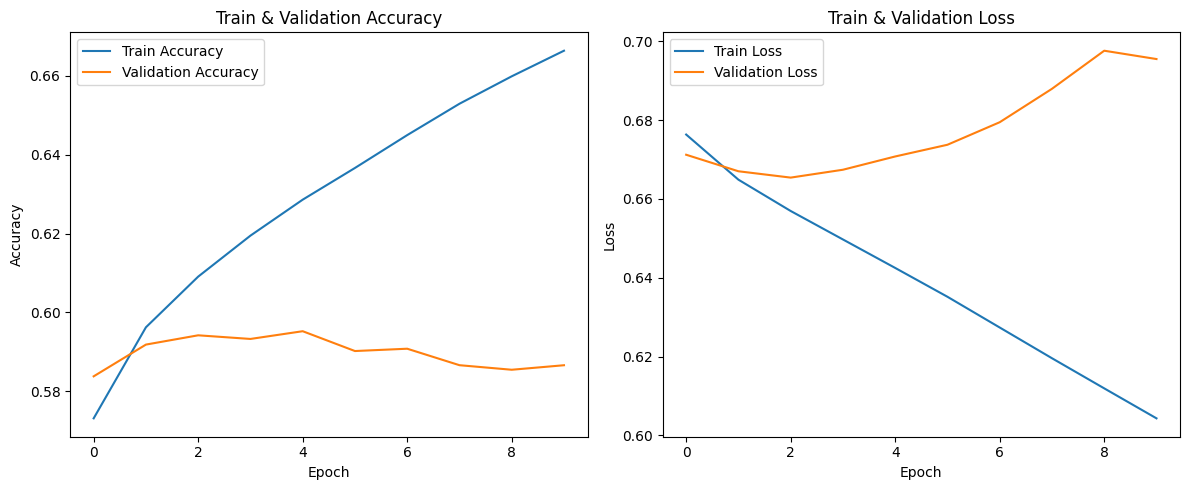

In [91]:
plot_metrics(history1)

### Matriz de confusión

In [13]:
from sklearn.metrics import confusion_matrix
def confusion_matrix_plot(model, X_test_, y_test_):
    y_pred_ = model.predict(X_test_)
    cm = confusion_matrix(y_test_, y_pred_.round())
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=True, yticklabels=True)
    plt.title('Matriz de Confusión')
    plt.xlabel('Predicción')
    plt.ylabel('Real')
    plt.show()

6740/6740 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step


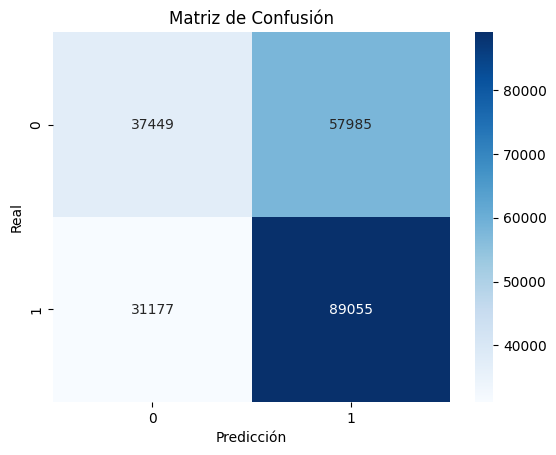

In [92]:
confusion_matrix_plot(model1, X_test, y_test)

### Curva ROC

In [14]:
from sklearn.metrics import roc_curve, roc_auc_score
def roc_graphic(model, X_test_, y_test_):
    y_pred_proba = model.predict(X_test_)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    auc = roc_auc_score(y_test_, y_pred_proba)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label='Curva ROC (AUC = {:.2f})'.format(auc))
    plt.plot([0, 1], [0, 1], 'k--')  # Línea de referencia para un clasificador aleatorio
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Tasa de falsos positivos')
    plt.ylabel('Tasa de verdaderos positivos')
    plt.title('Curva ROC')
    plt.legend(loc='lower right')
    plt.show()

6740/6740 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step


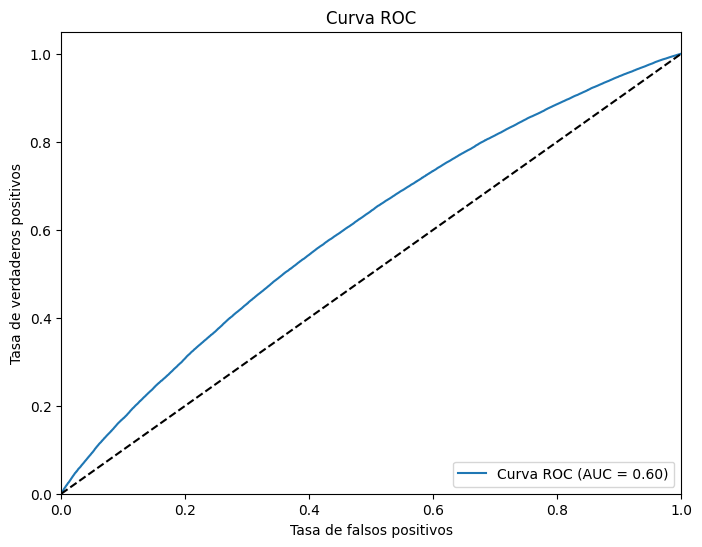

In [93]:
roc_graphic(model1, X_test, y_test)

## Red neuronal 2
Construcción de una red neuronal con 5 capas ocultas, con 256 neuronas cada una. Se utiliza la función de activación ReLU en las capas ocultas y una capa de salida con activación sigmoide. Esta red sigue una arquitectura de capas ocultas con el mismo número de neuronas.

### Creación del modelo

In [94]:
model2 = Sequential()
model2.add(Dense(256, activation='relu'))
model2.add(Dense(256, activation='relu'))
model2.add(Dense(256, activation='relu'))
model2.add(Dense(256, activation='relu'))
model2.add(Dense(256, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', tf.keras.metrics.Recall(),tf.keras.metrics.Precision(), tf.keras.metrics.F1Score()])
model2.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

### Entrenamiento del modelo

In [95]:
history2 = model2.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_test, y_test))

Epoch 1/10
3932/3932 ━━━━━━━━━━━━━━━━━━━━ 37s 8ms/step - accuracy: 0.5652 - f1_score: 0.7156 - loss: 0.6803 - precision_3: 0.5700 - recall_3: 0.8963 - val_accuracy: 0.5865 - val_f1_score: 0.7159 - val_loss: 0.6704 - val_precision_3: 0.6039 - val_recall_3: 0.7510
Epoch 2/10
3932/3932 ━━━━━━━━━━━━━━━━━━━━ 34s 9ms/step - accuracy: 0.5973 - f1_score: 0.7153 - loss: 0.6650 - precision_3: 0.6087 - recall_3: 0.7747 - val_accuracy: 0.5937 - val_f1_score: 0.7159 - val_loss: 0.6668 - val_precision_3: 0.6096 - val_recall_3: 0.7546
Epoch 3/10
3932/3932 ━━━━━━━━━━━━━━━━━━━━ 34s 9ms/step - accuracy: 0.6126 - f1_score: 0.7162 - loss: 0.6553 - precision_3: 0.6256 - recall_3: 0.7614 - val_accuracy: 0.5936 - val_f1_score: 0.7159 - val_loss: 0.6659 - val_precision_3: 0.6138 - val_recall_3: 0.7307
Epoch 4/10
3932/3932 ━━━━━━━━━━━━━━━━━━━━ 33s 8ms/step - accuracy: 0.6236 - f1_score: 0.7149 - loss: 0.6473 - precision_3: 0.6356 - recall_3: 0.7580 - val_accuracy: 0.5957 - val_f1_score: 0.7159 - val_loss: 0.66

### Evaluación del modelo

In [96]:
results2 = model2.evaluate(X_test, y_test)
print('Loss: ', results2[0])
print('Accuracy: ', results2[1])
print('Recall: ', results2[2])
print('Precision: ', results2[3])
print('F1 Score: ', results2[4])

6740/6740 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.5800 - f1_score: 0.7163 - loss: 0.7048 - precision_3: 0.6101 - recall_3: 0.6850
Loss:  0.7027289867401123
Accuracy:  0.5816864967346191
Recall:  0.688701868057251
Precision:  0.6106849908828735
F1 Score:  0.7158839106559753


### Gráficos de métricas de precisión y error

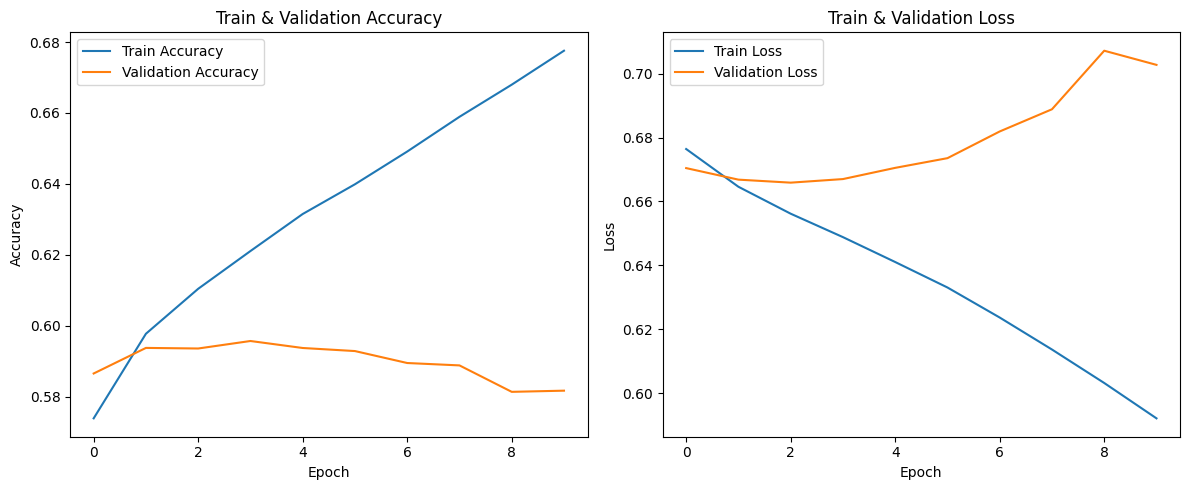

In [97]:
plot_metrics(history2)

### Matriz de confusión

6740/6740 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step


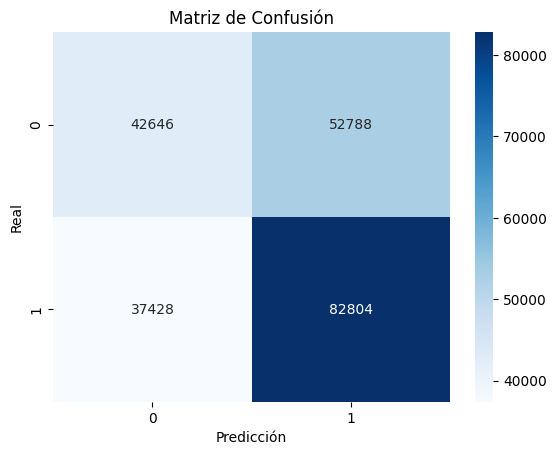

In [98]:
confusion_matrix_plot(model2, X_test, y_test)

### Curva ROC

6740/6740 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step


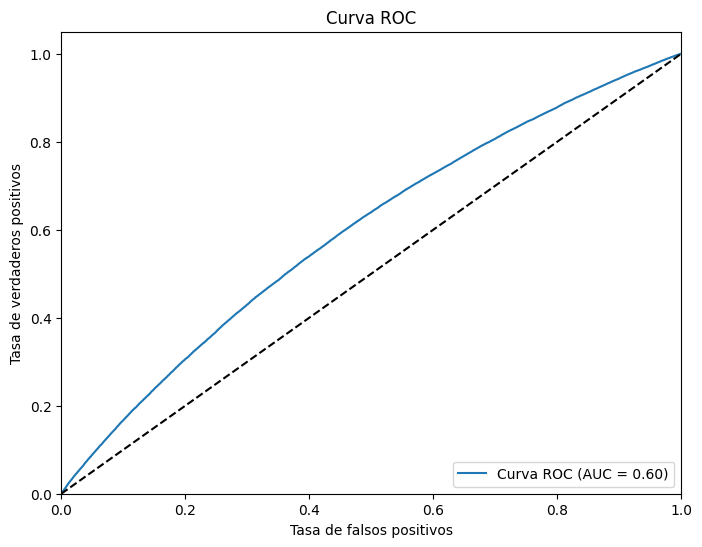

In [99]:
roc_graphic(model2, X_test, y_test)

## Regresor logistico
Construcción de un regresor logistico para el mismo problema, y con los datos ya preprocesados

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# Crear y entrenar el modelo de regresión logística
log_reg = LogisticRegression(random_state=42, class_weight='balanced', max_iter=500) #Se utiliza balanced para intentar manejar un mejor balanceo entre las clases
log_reg.fit(X_train, y_train)

# Predicciones y evaluación
y_pred_log = log_reg.predict(X_test)
print(classification_report(y_test, y_pred_log))


              precision    recall  f1-score   support

           0       0.48      0.55      0.51     95434
           1       0.60      0.53      0.56    120232

    accuracy                           0.54    215666
   macro avg       0.54      0.54      0.54    215666
weighted avg       0.55      0.54      0.54    215666



El modelo de regresión logística muestra un rendimiento moderado en la predicción de los resultados de las batallas. La precisión para la clase 0 (derrotas de Player 1) es del 48%, mientras que para la clase 1 (victorias de Player 1) es del 60%, lo que indica que el modelo es más preciso al predecir victorias que derrotas.

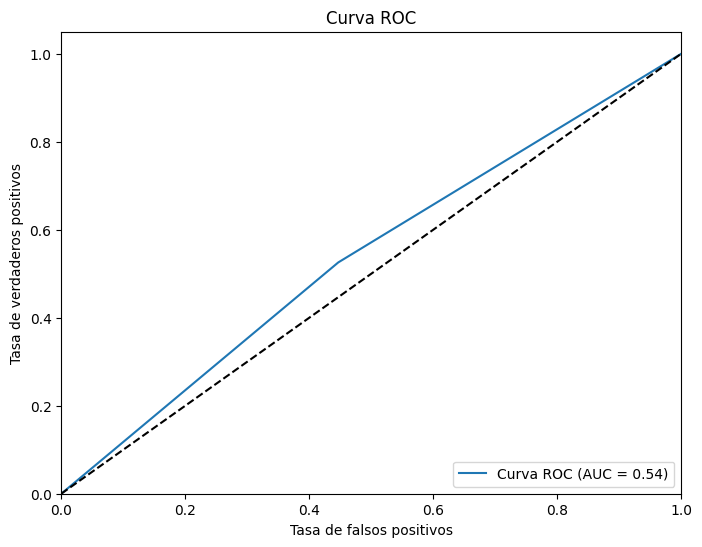

In [19]:
# Llamada a la función para graficar la curva ROC
roc_graphic(log_reg, X_test, y_test)

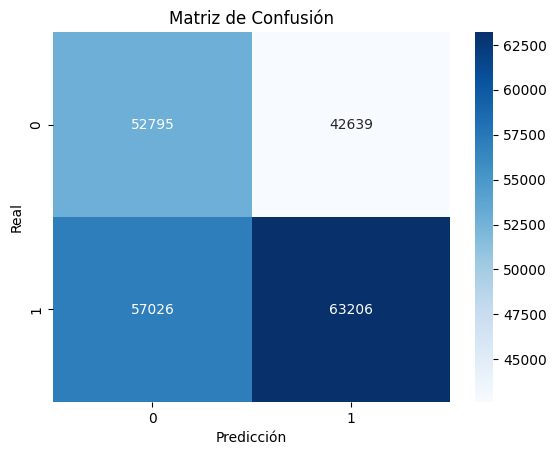

In [20]:
# Llamada a la función para graficar la matriz de confusión
confusion_matrix_plot(log_reg, X_test, y_test)

## **Modelo propuesto**
En esta sección se puede evidenciar el modelo propuesto para la resoulución de este problema en pro de obtener un mayor resultado para la predicción de las dos posibles clases del modelo.

### **Pre Procesamiento con Bayes**
En primer lugar, se utiliza Naive Bayes para modelar la relación entre las cartas en los mazos de los jugadores y la probabilidad de ganar o perder.

In [26]:
from sklearn.naive_bayes import GaussianNB
import numpy as np

# Entrenar el modelo de Naive Bayes
bayes_model = GaussianNB()
bayes_model.fit(X_train, y_train)

# Generar probabilidades de predicción
y_pred_proba_bayes_train = bayes_model.predict_proba(X_train)[:, 1]
y_pred_proba_bayes_test = bayes_model.predict_proba(X_test)[:, 1]

# Agregar las probabilidades como nuevas características
X_train_bayes = np.column_stack((X_train, y_pred_proba_bayes_train))
X_test_bayes = np.column_stack((X_test, y_pred_proba_bayes_test))


### **Combinación de modelos**
Ahora se utiliza la red neruonal utilizada anteriormente pero combinada con las probabilidades dadas por el modelo de bayes, ademas de incluir diferentes funciones para reducir el overfitting.

In [59]:
# Red Neuronal donde se incluye el Dropout para evitar overfitting
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import tensorflow as tf

modelMix = Sequential()
modelMix.add(Dense(256, activation='relu'))
modelMix.add(Dropout(0.5))  # 50% de Dropout después de la primera capa

modelMix.add(Dense(128, activation='relu'))
modelMix.add(Dropout(0.5))  # 50% de Dropout después de la segunda capa

modelMix.add(Dense(64, activation='relu'))
modelMix.add(Dropout(0.5))  # 50% de Dropout después de la tercera capa

modelMix.add(Dense(32, activation='relu'))
modelMix.add(Dropout(0.5))  # 50% de Dropout después de la cuarta capa

modelMix.add(Dense(16, activation='relu'))
modelMix.add(Dropout(0.5))  # 50% de Dropout después de la quinta capa

modelMix.add(Dense(1, activation='sigmoid'))

# Compilar el modelo
modelMix.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', tf.keras.metrics.Recall(), tf.keras.metrics.Precision(), tf.keras.metrics.AUC()])

modelMix.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [61]:
from tensorflow.keras.callbacks import EarlyStopping

# Definir early stopping --> Se va a utilizar para que no se sobre entrene el modelo
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Entrenar el modelo con early stopping
historyMix = modelMix.fit(X_train_bayes, y_train, epochs=20, batch_size=128, 
                        validation_data=(X_test_bayes, y_test), 
                        callbacks=[early_stopping])


Epoch 1/20
3932/3932 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - accuracy: 0.5522 - auc: 0.5140 - loss: 0.6881 - precision_1: 0.5572 - recall_1: 0.9531 - val_accuracy: 0.5575 - val_auc: 0.5544 - val_loss: 0.6831 - val_precision_1: 0.5575 - val_recall_1: 1.0000
Epoch 2/20
3932/3932 ━━━━━━━━━━━━━━━━━━━━ 21s 5ms/step - accuracy: 0.5569 - auc: 0.5475 - loss: 0.6836 - precision_1: 0.5570 - recall_1: 0.9990 - val_accuracy: 0.5575 - val_auc: 0.5725 - val_loss: 0.6815 - val_precision_1: 0.5575 - val_recall_1: 0.9998
Epoch 3/20
3932/3932 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - accuracy: 0.5590 - auc: 0.5632 - loss: 0.6812 - precision_1: 0.5616 - recall_1: 0.9503 - val_accuracy: 0.5614 - val_auc: 0.5879 - val_loss: 0.6784 - val_precision_1: 0.5603 - val_recall_1: 0.9902
Epoch 4/20
3932/3932 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.5662 - auc: 0.5787 - loss: 0.6780 - precision_1: 0.5730 - recall_1: 0.8715 - val_accuracy: 0.5748 - val_auc: 0.5954 - val_loss: 0.6776 - val_precision_1: 0.5737 - val_recal

6740/6740 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step
6740/6740 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step


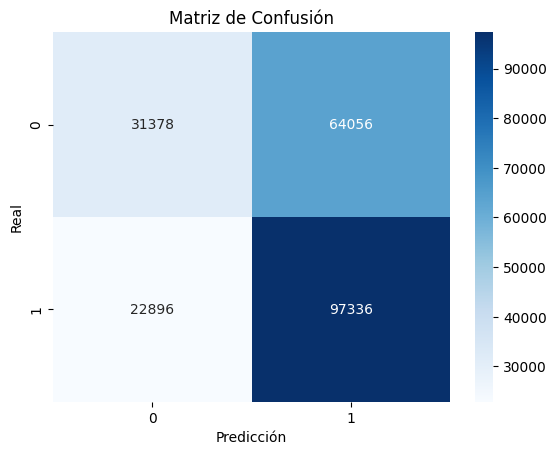

In [62]:
# Realizar predicciones en el conjunto de prueba
y_pred = modelMix.predict(X_test_bayes)
y_pred_binary = (y_pred > 0.5).astype(int).flatten()  # Convertir probabilidades a clases binarias

confusion_matrix_plot(modelMix, X_test_bayes, y_test)

In [63]:
# Calcular el informe de clasificación
class_report = classification_report(y_test, y_pred_binary)
# Imprimir el informe de clasificación
print("Informe de Clasificación:")
print(class_report)

Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.58      0.33      0.42     95434
           1       0.60      0.81      0.69    120232

    accuracy                           0.60    215666
   macro avg       0.59      0.57      0.56    215666
weighted avg       0.59      0.60      0.57    215666



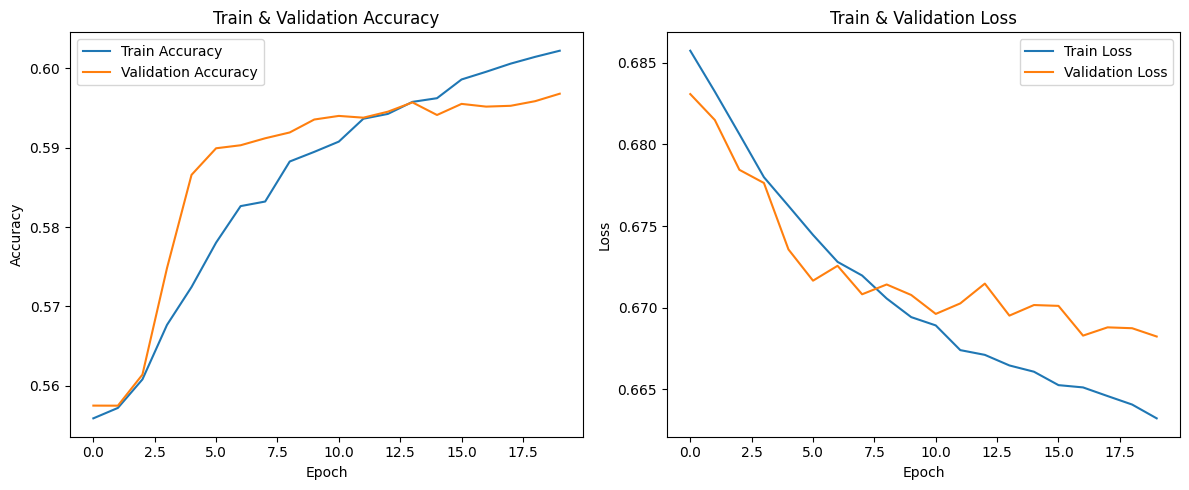

In [64]:
plot_metrics(historyMix)

6740/6740 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step


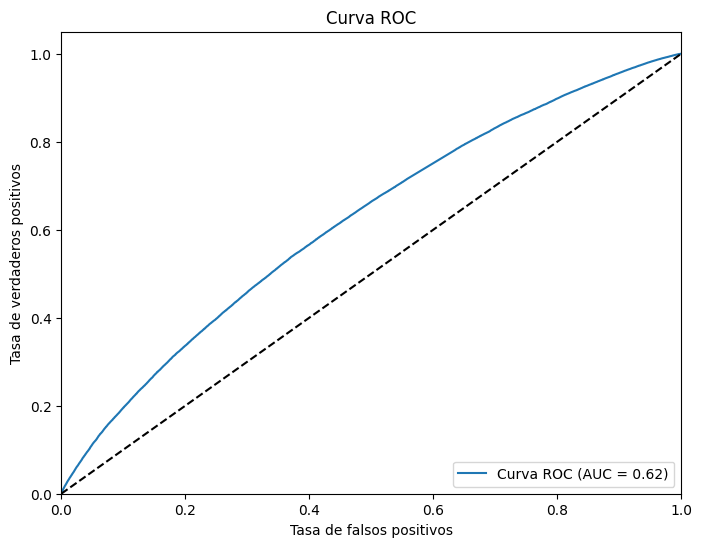

In [65]:
roc_graphic(modelMix, X_test_bayes, y_test)

In [69]:
resultsMix = modelMix.evaluate(X_test_bayes, y_test)
print('Loss: ', resultsMix[0])
print('Accuracy: ', resultsMix[1])
print('Recall: ', resultsMix[2])
print('Precision: ', resultsMix[3])
print('F1 Score: ', resultsMix[4])

6740/6740 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.5954 - auc: 0.6153 - loss: 0.6687 - precision_1: 0.6027 - recall_1: 0.8072
Loss:  0.6682398915290833
Accuracy:  0.5968210101127625
Recall:  0.8095681667327881
Precision:  0.60310298204422
F1 Score:  0.617656946182251
